$L_X=\beta+\gamma\log L_{UV}$  
$L_X$--X-ray,$L_{UV}$--rest-frame ultraviolet

$\log(F_X)=\beta+(\gamma-1)\log(4\pi)+\gamma\log(F_{UV})+2(\gamma-1)\log(d_L)$  
$\log=\log_{10}$

$DM(z)=\dfrac{5}{2(\gamma-1)}[\log(F_X)-\gamma\log(F_{UV})-\beta']$  
$\beta'=\beta+(\gamma-1)\log(4\pi)$

$DM(z)=5\log(d_L(z)/Mpc)+25$

$\ln (\mathcal{L}) = -\dfrac{1}{2}\sum\biggl\{ \dfrac{{{{\left [ {{{\log }_{10}}{{({F_{X}})}_{i}} - \Phi ({{[{F_{UV}}]}_{i}},{d_{L}}[{z_{i}}])} \right ]}^{2}}}}{{\tilde{\sigma}_{i}^{2}}}+ \ln (2\pi \tilde{\sigma}_{i}^{2})\biggr\}$  
$\tilde{\sigma}_{i}^{2} \equiv {\delta ^{2}} + \sigma _{i}^{2}$

In [58]:
import numpy as np

# file_path = "./QSO/data/table3.dat"
file_path = "./data/table3.dat"
data = np.loadtxt(file_path, skiprows=1, usecols=(3,4,5,6,7,11,12))
z = data[:,0]
logFUV = data[:,1]
e_logFUV = data[:,2]
logFX = data[:,3]
e_logFX = data[:,4]
DM = data[:,5]
e_DM = data[:,6]

In [59]:
import sys
sys.path.append("../")
from solution import solution, const_c

In [60]:
def DM_z(log_kC1, O20, H0):
    t0 = 1 / H0
    t_values = solution(log_kC1, O20, H0).t
    z_values = solution(log_kC1, O20, H0).y[0, :]
    dl_values = []

    for z_value in z:
        idx = np.searchsorted(z_values, z_value)
        if idx >= len(z_values):  
            idx = len(z_values) - 1
        int_value = -np.trapz(z_values[:idx], t_values[:idx])
        dl_value = const_c * (1 + z_value) * (t0 - t_values[idx] + int_value)
        dl_values.append(dl_value)

    dl = np.array(dl_values)
    muth = 5 * np.log10(dl) + 25
    return muth

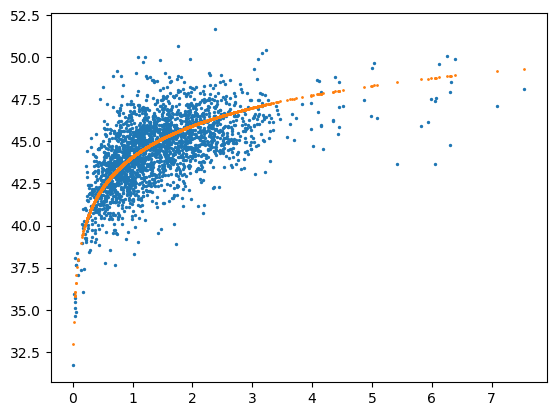

In [61]:
import matplotlib.pyplot as plt
plt.scatter(z, DM, s=2)
plt.scatter(z, DM_z(-3,0.3,70), s=1)
plt.show()

In [62]:
chi2 = np.sum((DM - DM_z(-5,0.3,70))**2 / e_DM**2)
print(chi2)

116192.48149215213


In [63]:
def logFX_z(log_kC1, O20, H0, beta, gamma):
    t0 = 1 / H0
    t_values = solution(log_kC1, O20, H0).t
    z_values = solution(log_kC1, O20, H0).y[0, :]
    dl_values = []

    for z_value in z:
        idx = np.searchsorted(z_values, z_value)
        if idx >= len(z_values):  
            idx = len(z_values) - 1
        int_value = -np.trapz(z_values[:idx], t_values[:idx])
        dl_value = const_c * (1 + z_value) * (t0 - t_values[idx] + int_value)
        dl_values.append(dl_value)

    dl = np.array(dl_values)
    return beta+(gamma-1)*np.log10(4*np.pi)+gamma*logFUV+2*(gamma-1)*np.log10(dl)

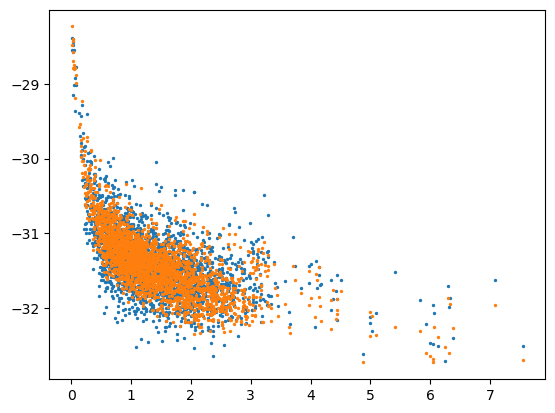

In [64]:
import matplotlib.pyplot as plt
plt.scatter(z, logFX, s=2)
plt.scatter(z, logFX_z(-4,0.3,70,-11.3,0.6), s=2)
plt.show()

In [65]:
chi2 = np.sum((logFX - logFX_z(-4,0.3,70,-11.3,0.6))**2 / e_logFX**2)
print(chi2)

388706.5760511682
